In this post, we will use Facebook prophet with Python. We try to forecast the share price of Amazon Stock (from 1997) using the share price data.

In [3]:
!pip install prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet # Updated import statement
from sklearn.metrics import mean_squared_error, mean_absolute_error # Fixed typo in mean_squared_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


Since we need only two columns date and adjusted close price, so, we subset the original dataset to get these columns. Since the data is required in a prophet in the form of two columns named ds (for date column) and y (for data column).

In [5]:
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two collumns from data frame
df = df[['ds', 'y']]

df.head()

,ds,y
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


Now, we split the data frame into train and test data, we will be using 4 years of data for training and a year of data for test purpose

In [7]:
# split data frame  into two parts train and test
split_date = "2019-07-21"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

Now, we instantiate the Facebook prophet API, this prophet API works similar to scikit-learn. It uses the fit function to fit the dataset into the model and predict function to forecast future values.

In [17]:
!pip install prophet  # Install the 'prophet' package (renamed from 'fbprophet')
from prophet import Prophet  # Import from the 'prophet' module

# Instantiate prophet
model = Prophet()
# fit the training data
model.fit(df_train)
forecast = model.predict(df_test)
forecast.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9r9jbs_/ccq7hwt3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9r9jbs_/c2j464h7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79118', 'data', 'file=/tmp/tmpf9r9jbs_/ccq7hwt3.json', 'init=/tmp/tmpf9r9jbs_/c2j464h7.json', 'output', 'file=/tmp/tmpf9r9jbs_/prophet_modelyfnhy290/prophet_model-20240902055105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
79,2019-11-11,2006.459472,1917.866120,2081.157174,2004.989629,2007.062495,-7.429236,-7.429236,-7.429236,-2.913462,-2.913462,-2.913462,-4.515774,-4.515774,-4.515774,0.0,0.0,0.0,1999.030236
80,2019-11-12,2007.467203,1909.254464,2087.540678,2005.943089,2008.128996,-7.017169,-7.017169,-7.017169,-2.425526,-2.425526,-2.425526,-4.591643,-4.591643,-4.591643,0.0,0.0,0.0,2000.450034
81,2019-11-13,2008.474935,1917.582958,2084.537238,2006.898424,2009.250874,-7.635941,-7.635941,-7.635941,-2.994173,-2.994173,-2.994173,-4.641768,-4.641768,-4.641768,0.0,0.0,0.0,2000.838994
82,2019-11-14,2009.482667,1920.677227,2085.581460,2007.850171,2010.334472,-7.363716,-7.363716,-7.363716,-2.701490,-2.701490,-2.701490,-4.662226,-4.662226,-4.662226,0.0,0.0,0.0,2002.118951
83,2019-11-15,2010.490398,1911.566131,2085.888720,2008.792997,2011.409853,-7.937410,-7.937410,-7.937410,-3.287682,-3.287682,-3.287682,-4.649728,-4.649728,-4.649728,0.0,0.0,0.0,2002.552989


As we can see this column contains the date column, predict share price (y_hat), lower and upper estimates of it, trend components, seasonal components (weekly and yearly).

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


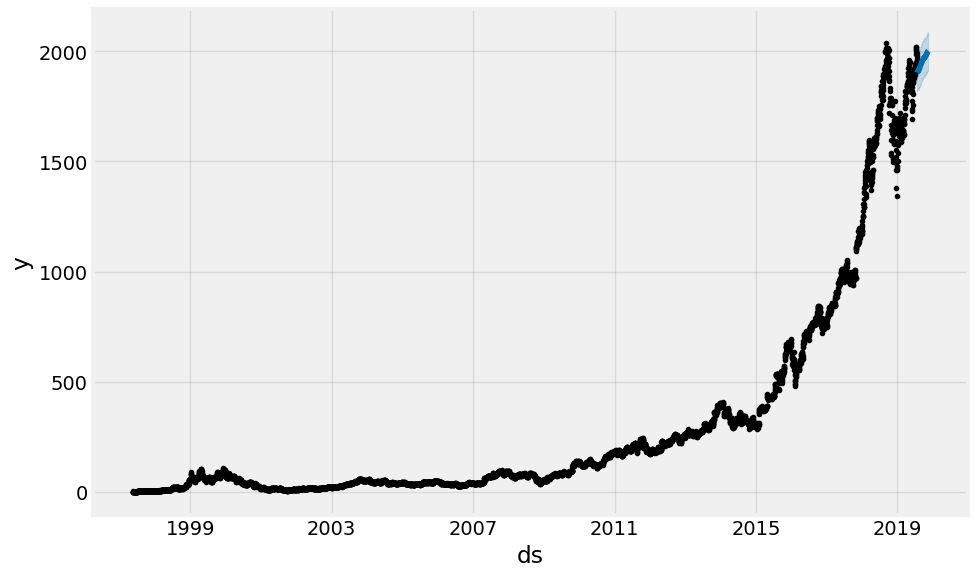

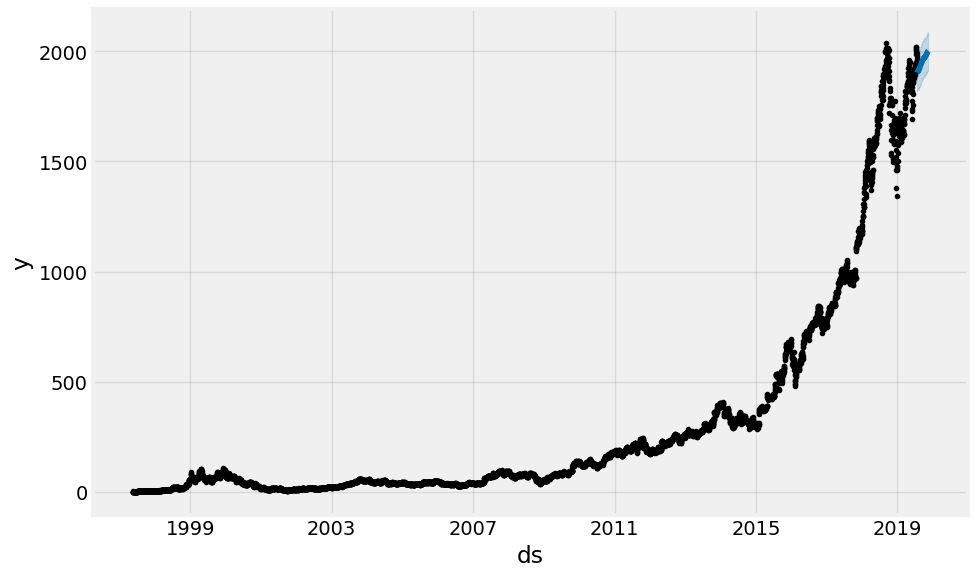

In [19]:
model.plot(forecast)

The command will plot the components of the prophet such as: trend line, weekly and yearly seasonality.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

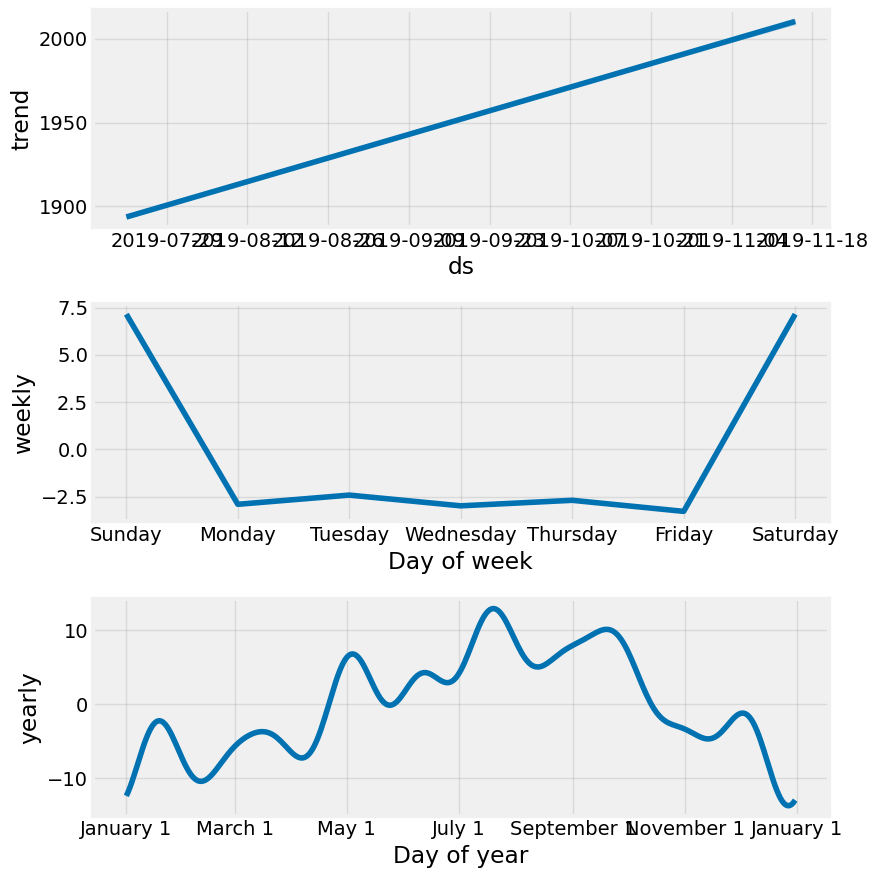

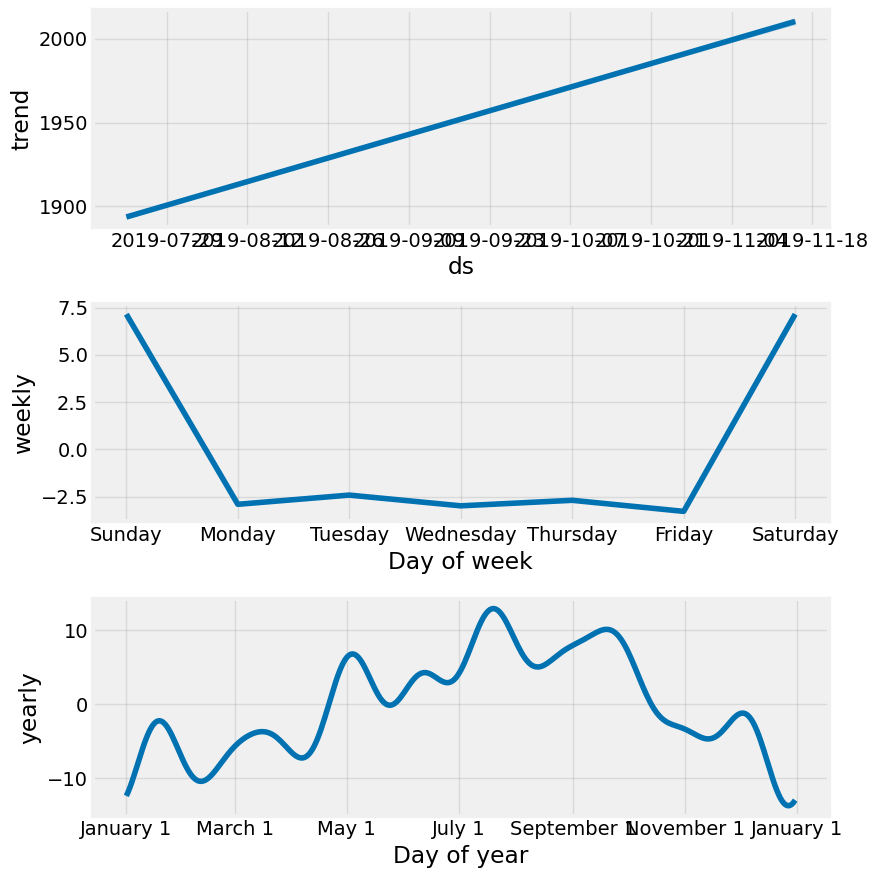

In [25]:
# plot graphs of different components:
model.plot_components(forecast)

Now, we calculate the mean square error and mean absolute error for the forecasted data.

In [26]:

print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 31712.482220779657
Mean Absolute Error (MAE): 166.65097525616935


Now, we calculate the mean absolute percentage error of our forecast, because it gives a better idea about how accurate our prediction is

In [28]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  9.381713173742112
